# Якубов Артём ИУ5-24М Вариант 16, задачи 16/36

In [ ]:
!pip freeze

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

Загрузка датасета

In [3]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**Задача 16**

In [4]:
boxcox_data = scipy.stats.boxcox(data['total_rooms'])
print(boxcox_data)

(array([24.47623037, 26.44507967, 14.22151154, ..., 20.26050259,
       20.25066479, 18.30987437]), 0.2104230396337911)


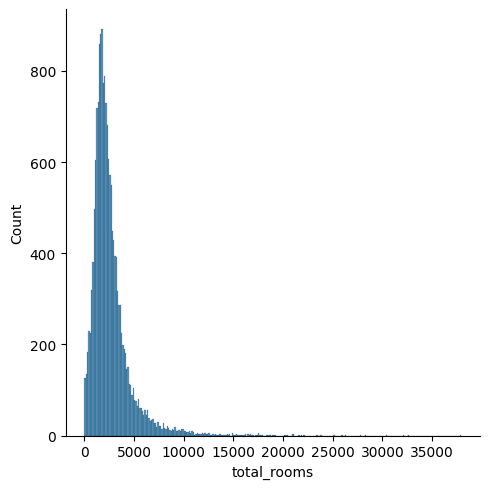

In [5]:
sns.displot(data['total_rooms'])

Преобразованные данных в нормальное распределение

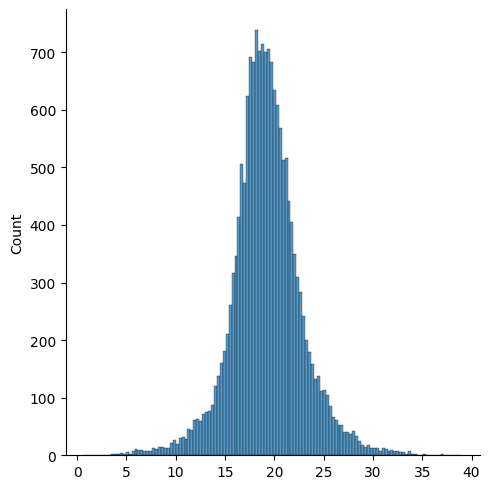

In [6]:
sns.displot(boxcox_data[0])

In [16]:
weather = pd.read_csv('/content/weatherHistory.csv')
weather.shape


(96453, 12)

In [17]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
sns.displot(weather['Pressure (millibars)'])

In [33]:
temp = weather['Humidity']
temp[temp <= 0] = 1
print(temp)

0        0.89
1        0.86
2        0.89
3        0.83
4        0.83
         ... 
96448    0.43
96449    0.48
96450    0.56
96451    0.60
96452    0.61
Name: Humidity, Length: 96453, dtype: float64


<ipython-input-33-7c8825752753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[temp <= 0] = 1


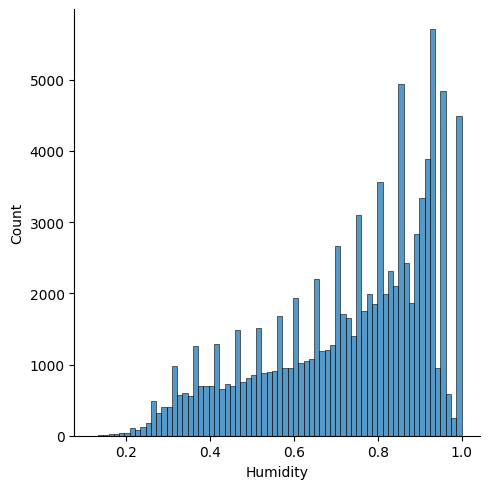

In [37]:
sns.displot(weather['Humidity'])

In [34]:
box_temp = scipy.stats.boxcox(temp)
print(box_temp)

(array([-0.10374596, -0.12987327, -0.10374596, ..., -0.3403855 ,
       -0.31762465, -0.31168041]), 2.0350952880697135)


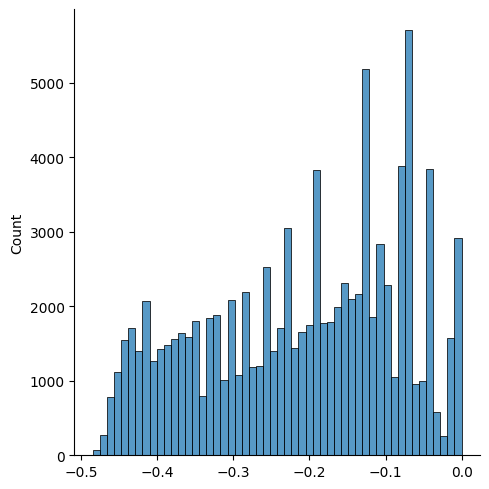

In [36]:
sns.displot(box_temp[0])

**Задача 36**

In [53]:
from sklearn import datasets

# Load the dataset
diabetes = datasets.load_diabetes()

In [58]:
diabetes = datasets.load_diabetes(as_frame=True)

print(diabetes['target'])

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


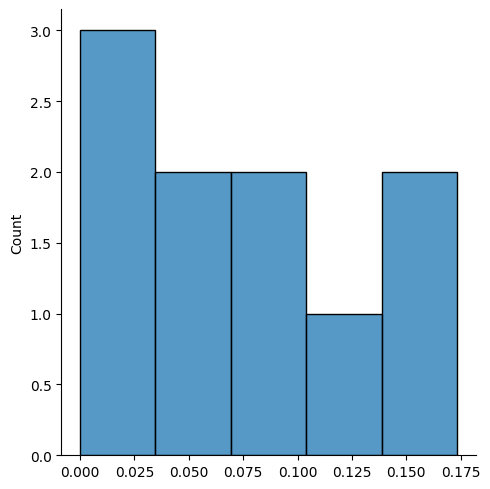

In [61]:
test3 = mutual_info_regression(diabetes['data'],diabetes['target'])
test3 = pd.Series(test3)
sns.displot(test3)

In [63]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(diabetes['data'],diabetes['target'])
list(zip(diabetes['feature_names'], sel_mi.get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', False),
 ('s1', False),
 ('s2', False),
 ('s3', True),
 ('s4', True),
 ('s5', True),
 ('s6', True)]